# Reading GSF files

Reading the measurement data from a .gsf file using `GsfReader` object. The reader returns a `GwyField` objects that has attributes containing basic informations about the image like real image size and center offset.

Real X size: 5e-06 / m, Real Y size: 5e-06 / m, X offset: 4.73929342291318e-05, Y offset: 4.72521388071066e-05


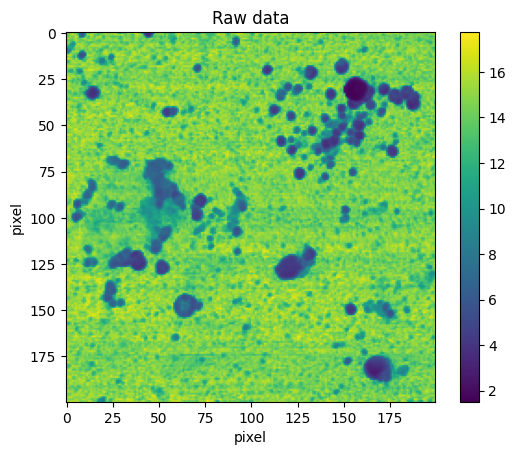

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from pySNOM import readers, images
import os

fdata = 'datasets/testPsHet O3A raw.gsf'

data_reader = readers.GsfReader(os.path.join(pySNOM.__path__[0], fdata))
gsfdata = data_reader.read()

print(f'Real X size: {gsfdata.xreal} / m, Real Y size: {gsfdata.yreal} / m, X offset: {gsfdata.xoff}, Y offset: {gsfdata.yoff}')
plt.imshow(gsfdata.data)
plt.xlabel('pixel')
plt.ylabel('pixel')
plt.title('Raw data')
plt.colorbar()
plt.show()


## Creating an image object

pySNOM implements and `Image` and a `GwyImage` object that can store all the relevant informations related to near-field measurements. This is useful for later data processing and helps keep track of the measurement information of the given data. For example measurement mode (PsHet, AFM, PTE+, TERS, etc.), datatype (Amplitude, Phase, Topography), .....

There are two ways to create the `Image/GwyImage` objects and feed the measurement information to it.

### Setting parameters from info text files:

NeaSNOM instrument usually generate a `.txt` file when you download the measurements from the machine database. It is located in the same folder as all the measurement files. pySNOM's `NeaInfoReader` can read these text files and you can assign this to the `Image` object.

In [43]:
finfo = 'datasets/testinfofile.txt'
info_reader = readers.NeaInfoReader(os.path.join(pySNOM.__path__[0], finfo))
infodict = info_reader.read()

print(list(infodict.keys()))

['Scan', 'Project', 'Description', 'Date', 'ScannerCenterPosition', 'Rotation', 'ScanArea', 'PixelArea', 'Averaging', 'Integrationtime', 'LaserSource', 'Detector', 'TargetWavelength', 'DemodulationMode', 'TipFrequency', 'TipAmplitude', 'TappingAmplitude', 'ModulationFrequency', 'ModulationAmplitude', 'ModulationOffset', 'Setpoint', 'Regulator', 'TipPotential', 'M1AScaling', 'QFactor', 'Version']


Create the `GwyImage` object to store the read data and parameters:

In [44]:
imageobj = images.GwyImage(gsfdata, info=infodict)
print(f'Channeltype: {imageobj.channeltype}, Datatype: {imageobj.datatype}')

Channeltype: ChannelTypes.None, Datatype: DataTypes.Topography


As you see the proper datatype is not set because there is no information about the specific channel in the info file. The channel and datatype is set by providing `channelname` when creating `GwyImage` instance:

In [45]:
channel_name = 'O3A raw'
imageobj = images.GwyImage(gsfdata, info=infodict)
imageobj.channel = channel_name

print(f'Channeltype: {imageobj.channeltype}, Demodulation order: {imageobj.order}, Datatype: {imageobj.datatype}')

Channeltype: ChannelTypes.Optical, Demodulation order: 3, Datatype: DataTypes.Amplitude


# Image processing

The image processors are implemented as separate classes. You can set up an instance of the processor given by the basic atrributes and call `transform` method to conduct the correction.

[]

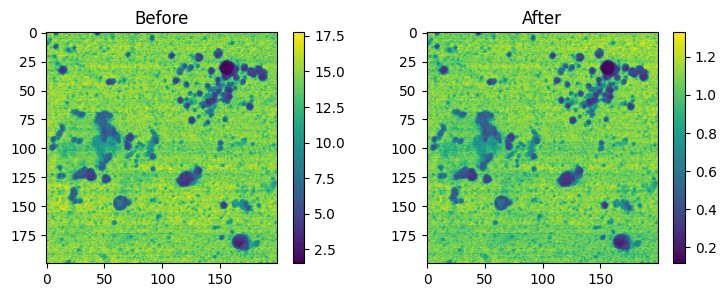

In [54]:

# transformer = images.LineLevel(method='median',datatype=imageobj.datatype)
# transformer = images.RotatePhase(degree=90.0)
# d = transformer.transform(imageobj.data)

transformer = images.BackgroundPolyFit(xorder=1,yorder=1,datatype=imageobj.datatype)
# transformer = images.BackgroundPolyFit(xorder=1,yorder=1,datatype=images.DataTypes.Phase)
d, b = transformer.transform(imageobj.data)

# Plotting the BEFORE
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(900*px, 300*px))
im1 = ax1.imshow(imageobj.data)
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)

# Plotting the AFTER
im2= ax2.imshow(d)
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)

plt.plot()
